<a href="https://colab.research.google.com/github/pawel045/machine-learning-basics/blob/main/Predict_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [4]:
# load data and split on train/test sets
cifar10 = datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

170498071/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
# normalize the pixels
x_train = x_train/255.0
x_test = x_test/255.0

'truck'

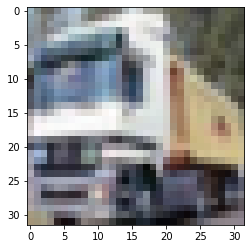

In [6]:
index = 1
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.imshow(x_train[index])
class_names[int(y_train[index])]

In [ ]:
# create convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# train the model
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4590 - accuracy: 0.4747
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1062 - accuracy: 0.6115
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9772 - accuracy: 0.6582
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8930 - accuracy: 0.6892
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8238 - accuracy: 0.7149
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7688 - accuracy: 0.7328
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7205 - accuracy: 0.7496
Epoch 8/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.6758 - accuracy: 0.7654
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6411 - accuracy: 0.7756
Epoch 10/10
313/313 [==============================] - 7s 21ms/s

[0.9242280125617981, 0.7046999931335449]

In [ ]:
# prediction on test set
prediction = model.predict(x_test)

313/313 [==============================] - 4s 14ms/step


'bird'

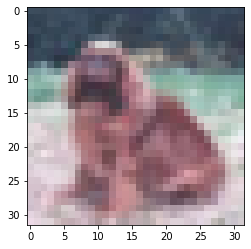

In [44]:
# result of prediction -> accuracy 70%
index = 101
plt.imshow(x_test[index])
class_names[prediction[index].argmax()]

In [25]:
# try improve the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(.25))
model.add(Dense(256, input_dim=4, activation='relu'))
model.add(Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [27]:
# train the new model -> accuracy 72%
model.fit(x_train, y_train, epochs=20)
model.evaluate(x_test, y_test)

Epoch 1/20
1563/1563 [==============================] - 54s 35ms/step - loss: 1.3396 - accuracy: 0.5201
Epoch 2/20
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0523 - accuracy: 0.6295
Epoch 3/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9161 - accuracy: 0.6799
Epoch 4/20
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8089 - accuracy: 0.7156
Epoch 5/20
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7207 - accuracy: 0.7462
Epoch 6/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6496 - accuracy: 0.7757
Epoch 7/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.5819 - accuracy: 0.7951
Epoch 8/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.5264 - accuracy: 0.8138
Epoch 9/20
1563/1563 [==============================] - 52s 34ms/step - loss: 0.4714 - accuracy: 0.8336
Epoch 10/20
1563/1563 [==============================] - 51s 33m

[1.1403217315673828, 0.7249000072479248]